###### ** 1.  Integration Techniques **

## ** 1.1  Midpoint Rule **

One numerical method for approximating integrals is the midpoint rule.  This method uses a simple polynomial, $p(x)$, to represent a function, $f(x)$, over a particular interval.

$$ \int_a^b f(x)dx \ \approx \ \int_a^b p(x)dx $$

This numerical approximation utilizes a single point, the midpoint, $mp$.

$$ mp\ =\ \frac{a+b}{2} $$

$$ \int_a^b p(x)dx \ = \ \int_a^b f(mp)dx \ = \ (b-a) f(mp) $$ 

For the midpoint method to yield a reasonable result, we break up the interval into several subintervals, apply the midpoint rule to each subinterval, and sum over all subintervals. This implementation is known as the composite midpoint rule.

In the next cell, necessary packages are imported such as NumPy, which is needed to preform certain mathmatical operations, and Matplotlib, required for visualization. We also define the function that we want analyze. By default the function is defined as $sin(x)$, but you are encouraged to try your own function.

**An important note for this notebooks: **when defining functions, you may want to explore functions not included in Python by default, such as sin(), cos(), e, etc. We typically incoporate these functions through the Numpy module by first importing Numpy as np in the beginning of our code and then defining these functions as np.sin(), np.cos(), and np.exp(). However, for this notebook, we will use a slightly different module called Sympy to define these functions. As you can see under imports, we have imported Sympy as syp. This means when you want to define functions, we will import them as syp.sin(), syp.cos(), syp.exp(). Sympy is a package that will help us calculate the analytical integral using Python, saving you the trouble from calculating them by hand.  

In [1]:
###########
# IMPORTS #
###########
# These are packages needed to perform the math and visualization

import numpy as np
import sympy as syp
import IPython
from IPython.display import Math
import matplotlib.pyplot as plt
import plotting_functions as pf
%matplotlib notebook

#############
# FUNCTIONS #
#############


def f(x):
    '''
    INPUT:
        x (float) array of floats
    OUTPUT: 
        returns (float)
    '''
    return syp.sin(x)



###############
# GLOBAL VARS #
###############
a = 0  # left most point of interval
b = np.pi  # right most point of interval
analytical_integral = pf.analytical_integral(f,a,b)
n = 1000  # number of subintervals to use


# dictionaries to hold error of each method
error = dict()

Now that we have the mathematical function we want to integrate, the Python functions to approximate the integral with the midpoint approximation need to be defined.

In [ ]:
#############
# FUNCTIONS #
#############


def midpoint(a, b, f):  # midpont rule evaluation of the function, called in Cmidpoint below
    '''
    INPUT
        a: (float) minimum x-value to evaluate
        b: (float) maximum x-value to evaluate
        f: function
    OUTPUT
        returns (float) integral of f evaluated as the midpoint of a and b
    '''
    mp = (a + b) / 2.0
    return (b - a) * f(mp)


def Cmidpoint(a, b, f, n_sub):
    '''
    INPUT
        a: (float) minimum x-value to evaluate
        b: (float) maximum x-value to evaluate
        f: function
        n_sub: (int) number of subections between [a,b] to evaluate
    OUTPUT
        returns (float) integral of f evaluated as the sum of each subsections midpoint
    '''
    # dividing the domain of the function (a to b) into subsections (Nsub)
    xvals = np.linspace(a, b, n_sub + 1)
    p = 0
    for i in range(n_sub):
        # approximating the integral by summing the midpoint evaluation for
        # each subsection
        p += midpoint(xvals[i], xvals[i + 1], f)
    return p
#############
# MAIN CODE #
#############
integral_estimator = Cmidpoint(a, b, f, n)
method = 'Midpoint Approximation'
error[method] = abs(integral_estimator - analytical_integral)
print('Method: {}'.format(method))
print('Answer = {:.6E}'.format(integral_estimator))
print('Number of evaluated points = {}'.format(n))


In [ ]:
#input variables are:
#(x minimum, x maximum, function, number of subsections)
pf.plot_midpoint_func(a, b, f, 8)

###### ** 1.2  Trapezoidal Rule **

In addition to the midpoint rule, the trapezoidal rule can also be utilized to approximate integrals.  However, in this case, two points are utilized instead of the single point approximation in the midpoint method.  A linear interpolation polynomial, $p(x)$, is used to approximate our desired function, $f(x)$.  The two points utilized in the approximation will be the endpoints of the interval: $(a, f(a))$ and $(b, f(b))$.

$$ p(x) \approx f(a)\frac{x\ -\ b}{a\ -\ b}\ +\ f(b)\frac{x\ -\ a}{b\ -\ a} $$

The approximation of our desired function then becomes:
$$ \int_a^b f(x)dx\ \approx\ \left[f(a)\frac{x\ -\ b}{a\ -\ b}\ +\ f(b)\frac{x\ -\ a}{b\ -\ a}\right]dx $$

which can be re-written as:

$$ \int_a^b f(x)dx\ \approx\ \frac{f(a)}{-h}\int_a^b(x\ -\ b)dx\ +\ \frac{f(b)}{h}\int_a^b(x\ -\ a)dx $$

where $$ h\ =\ b\ -\ a $$

and evaluating the integrals gives rise to

$$ \int_a^b f(x)dx\ \approx\ \frac{f(a)}{-h}\frac{(x\ -\ b)^2}{2}\Bigm|_a^b\ +\ \frac{f(b)}{h}\frac{(x\ -\ a)^2}{2}\Bigm|_a^b $$

Simplifying:

$$ \int_a^b f(x)dx\ \approx\ \frac{hf(a)}{2}\ +\ \frac{hf(b)}{2} = \frac{h}{2}\left[f(a)\ +\ f(b)\right] $$

A composite trapezoidal rule breaks up our interval into several subintervals, applies the trapezoidal rule to each subinterval, and sums over all subintervals. The cell defines a function that will evaluate an approximation to the integral $f(x)$ using  the composite trapezoid rule.

In [ ]:
#############
# FUNCTIONS #
#############

def trapezoid(a, b, f):
    '''
    INPUT
        a: (float) minimum x-value to evaluate
        b: (float) maximum x-value to evaluate
        f: function
        n_sub: (int) number of subections between [a,b] to evaluate
    OUTPUT
        returns (float) integral of f evaluated as the sum of trapezoidal area of each section
    '''
    h = (b - a)
    estimate = (f(a)+f(b))/2  # the final evaluation of f(x)
    return estimate * h

def Ctrapezoid(a, b, f, n_sub):
    xvals = np.linspace(a, b, n_sub + 1)
    estimate = 0
    for i in range(n_sub):
        estimate += trapezoid(xvals[i],xvals[i+1],f)
    return estimate


#############
# MAIN CODE #
#############
integral_estimator = Ctrapezoid( a, b, f, n)
method = 'Trapezoidal Rule'
error[method] = abs(integral_estimator - analytical_integral)
print("Method: {}".format(method))
print('Answer = {:.6E} +/- {:.6E}'.format(integral_estimator, error[method]))

Now that we have seen how to code the trapezoid rule, what does it actually look like in application? The Python function below will show a geometric interpretation of the trapezoid rule. Here the black line represents our function. Each vertical red line is the end point, $a$ and $b$, described above forming the sides of the trapezoid. What you should notice is how some parts of the curve are over-represented as a result of the trapezoid being taller than the function. However, there are also areas in which the trapezoid falls beneath the function, resulting in a lower area than required to describe the function. The success of the trapezoidal rule is reliant on the cancellation of these over and under estimations. 

In [ ]:
#input variables are:
#(x minimum, x maximum, function, number of subsections)
pf.plot_trapezoidal_func(a, b, f, 8)

## ** 1.3  Simpson's Rule **

For an attempt at a more accurate approximation, a three point approximation can be utilized, where a quadratic interpolation polynomial, $p(x)$ represents our function, $f(x)$.  In this case, our three points are $(a, f(a))$, $(b, f(b))$, and $(mp, f(mp))$, where $mp$ is the midpoint between $a$ and $b$. 

The quadratic interpolation polynomial takes on the form:

$$ p(x)\ =\ f(a)\frac{(x-mp)(x\ -\ b)}{(a\ -\ mp)(a\ -\ b)}\ +\ f(mp)\frac{(x\ -\ a)(x\ -\ b)}{(mp\ -\ a)(mp\ -\ b)}\ +\ f(b)\frac{(x\ -\ a)(x\ -\ mp)}{(b\ -\ a)(b\ -\ mp)} $$

where 

$$ \int_a^b p(x)dx\ =\ f(a)\int_a^b\frac{(x\ -\ mp)(x\ -\ b)}{(a\ -\ mp)(a\ -\ b)}dx\ +\ f(mp)\int_a^b\frac{(x\ -\ a)(x\ -\ b)}{(mp\ -\ a)(mp\ -\ b)}dx\ $$
$$ +\ f(b)\int_a^b\frac{(x\ -\ a)(x\ -\ mp)}{(b\ -\ a)(b\ -\ mp)}dx $$


which can be simplified to:

$$ \int_a^b f(x)dx\ \approx\ \frac{h}{3}\left[\ f(a)\ +\ 4f(mp)\ +\ f(b)\ \right] $$

where

$$ mp\ =\ \frac{a\ +\ b}{2} $$ and $$ h\ =\ \frac{b\ -\ a}{2} $$

In a similar fashion as the midpoint and trapezoidal rules, a composite Simpson's rule can also be applied, where we break up our interval into several subintervals, apply the Simpson's rule to each subinterval, and sum over all subintervals.

In [ ]:
#############
# FUNCTIONS #
#############


def Simpson(a, b, f):  #approximates the function between a and b as a polynomial
    '''
    INPUT
        a: (float) minimum x-value to evaluate
        b: (float) maximum x-value to evaluate
        f: function
    OUPUT
        returns (float)
    '''
    m = (a + b) / 2.0
    h = abs(b - a) / 2.0
    return h / 3.0 * (f(a) + 4.0 * f(m) + f(b))


def Csimpson(a, b, f, n_sub):
    '''
    INPUT
        a: (float) minimum x-value to evaluate
        b: (float) maximum x-value to evaluate
        f: function
        n_sub: (int) number of subections between [a,b] to evaluate
    OUPUT
        returns (float)
    '''
    xvals = np.linspace(a, b, n_sub + 1)
    estimate = 0
    for i in range(n_sub):
        # summing the approximations of f(x) for each subsection
        estimate = estimate + Simpson(xvals[i], xvals[i + 1], f)
    return estimate
#############
# MAIN CODE #
#############
integral_estimator = Csimpson(a, b, f, n)
method = 'Simpson\'s Rule'
error[method] = abs(integral_estimator - analytical_integral)
print("Method: {}".format(method))
print('Answer = {:.6E} +/- {:.6E}'.format(integral_estimator, error[method]))


The function in the following code block serves to give a geometric interpretation of the Simpson's rule approximation. Here the red points represent $(a,f(a))$ and $(b,f(b))$. The larger blue points represent the function evaluated at the midpoint of $a$ and $b$. A dotted line between the three points represents the estimated polynomial for that interval of the function. 

In [ ]:
#input variables are:
#(x minimum, x maximum, function, number of parabola)
pf.plot_simpsons_func(a, b, f, 4)

## ** 1.4  Gaussian Quadrature **
The previous approximations dealt with approximating integrals as simple polynomials evaluated at points uniformly distributed within the interval [a,b]. Gaussian quadrature follows naturally if one attempts to select *optimally* distributed points according to: 
$$ \int_a^b f(x)dx\ \approx\ \sum_{i\ =\ 1}^{n} w_i f(x_i) $$
The Gaussian quadrature weights, $ w_i $, may be found using Legendre polynomials ($P_n$), belonging to the family of *orthogonal polynomials*. The Legendre polynomials have roots at $x_i$, which become the sampling points. Although Gaussian quadrature estimation is defined over the interval [-1,1] and can be made universal through a change of variables:
$$ \int_a^b f(x)dx\ \approx\ \frac{b\ -\ a}{2}\sum_{i\ =\ 1}^{n} w_i f\left(\frac{b\ -\ a}{2} x_i\ +\ \frac{a\ +\ b}{2}\right) $$
where
$$ w_i\ =\ \frac{2}{(1\ -\ x_i^2)[P_n'(x_i)]^2} $$
The optimally chosen points, $x_i$, are now the $i$-th root of $P_n$.

In [ ]:
#############
# FUNCTIONS #
#############


def gaussian_quadrature(a, b, f, n):
    '''
    INPUT
        a: (float) minimum x-value to evaluate
        b: (float) maximum x-value to evaluate
        f: function
        n: (int) number of points to evaluate
    OUPUT
        returns (float)
    '''
    # determination of optimal points and weights for evaluation based on
    # legendre polynomials
    x, w = np.polynomial.legendre.leggauss(n)
    # change of variables for [-1,1] to [a,b]
    x = ((b - a) / 2.0) * x + ((b + a) / (2.0))
    try: 
        estimate = ((b - a) / 2.0) * np.sum(w * f(x))
    except:
        f_temp = pf.sympy2numpy_function_converter(f,x)
        estimate = ((b - a) / 2.0) * np.sum(w * f_temp(x))

        
    return estimate
#############
# MAIN CODE #
#############
integral_estimator = gaussian_quadrature(a, b, f, 8)
method = 'Gaussian Quadrature'
error[method] = abs(integral_estimator - analytical_integral)
print("Method: {}".format(method))
print('Answer = {:.6E} +/- {:.6E}'.format(integral_estimator,error[method]))


In the plot below, the roots of the Legendre polynomials, $x_i$, are evaluated for the function $f(x)$ and represented by the red circles. The difference in diameter of each circle represents the relative weight assigned to each point.

In [ ]:
#input variables are:
#(x minimum, x maximum, function, number of points)
pf.plot_gaussian_func(a, b, f, 8)

## ** 1.5  Monte Carlo **
Monte Carlo methods rely on the law of large numbers to approximate a definite integral; given a large enough sample size, a definite integral $f(x)$ on $[a,b]$ can be approximated by a sum:
$$ \int_a^b f(x)dx\ \approx\ \frac{1}{N} (b-a)\sum_{i\ =\ 1}^{N} f(x_i) $$
Unlike the previous methods that used equally space absiccas, Monte Carlo methods draw random numbers in the range of the function to evaluate. The true answer will lie within error bars or the uncertainty measurment of the esitmation. The uncertainty decreases with as the number of valued samples increases. The uncertainty is measures as the standard deviation of our results.
The distribution of from which sampling points are drawn can differ to enhance this method. Here we implement simple random sampling, which draws points from a uniform distribution. Importance sampling draws points from different distributions, which could reduce the number of points required to achieve the same numerical precision. 



In [ ]:
#############
# FUNCTIONS #
#############


def MonteCarlo(a, b, f, n):
    '''
    INPUT
        a: (float) minimum x-value to evaluate
        b: (float) maximum x-value to evaluate
        f: function
        n: (int) number of points to evaluate
    OUPUT
        estimate: (float) of the approximation of the integral of f
        uncertainty: (float) of the uncertainty in the appoximation of the integral of f
    '''
    f= pf.sympy2numpy_function_converter(f,n)
    random_samples = np.random.uniform(a, b, n)
    function_values = f(random_samples)
    estimate = (np.sum(function_values) / n) * (b - a)
    uncertainty = np.abs(
        b - a) * np.sqrt(((np.sum(function_values**2) / n) - (np.sum(function_values / n)**2)) / n)
    return estimate, uncertainty
#############
# MAIN CODE #
#############
method = 'Monte Carlo Approximation'
integral_estimator,error[method]= MonteCarlo(a, b, f, n)

print("Method: {}".format(method))
print('Answer = {:.6E} +/- {:.6E}'.format(integral_estimator,error[method]))


The plot below shows the function evaluated with Monte Carlo methods. Unlike the previous methods, the dots are not equally spaced, which reflects the random choices of $x$ used to evaluate 
$f(x)$. The variation in dot color is simply to make them more distinguishable.  

In [ ]:
#input variables are:
#(x minimum, x maximum, function, number of points)
pf.plot_MonteCarlo_func(a, b, f, 8)

# 1.6 What method should I choose

Of the three approximations with equally spaced abscissa, Simpson's gives the most accurate approximation, followed by trapezoidal, and midpoint. However, as observed in the test case of $sin(x)$, there are some problems in which the error cancellation of midpoint rule allows great performance. Gaussian quadrature tends to be the most accurate of the methods presented for 1-dimensional systems.  The necessity of Legendre polynomials can become costly for certain functions, which may render another method more effective. Monte Carlo methods may seem to underperform compared to the other methods for these 1-dimensional problems; however, Monte Carlo methods perform very well on higher dimensional problems.

In [ ]:
print("{:-^39}".format(""))
print("{:^25} : {:^11}".format("Method", "Error"))
print("{:->25}   {:->11}".format("", ""))
for i in sorted(error, key=error.get, reverse=True):
    print("{:>25} : {:>.5E}".format(i, error[i]))
print("{:-^39}".format(""))


## ** 1.7  Examples **



### a.
Below we apply the described methods to relevant physical chemsitry problems taken from McQuarrie and Simon Physical Chemistry: A Molecular Approach textbook. 

The heat capacity of a monoatomic crystal is given by
$$C_v\ =\ 9R\left(\frac{T}{\Theta}\right)^3\int_0^{\Theta_D/T}\frac{x^4e^x}{(e^x-1)^2}$$

where $\Theta_D$ is the Debeye temperature, a parameter characteristic of a crystaline substance, and $R$ is the molar gas constant. Given that $\Theta_D\ =\ 309\ \text{K}$ for copper calculate the molar heat capacity of copper at $103\ \text{K}$.

In [ ]:
def f(x):
    cv = 9.0 * 8.314 * (103. / 309.)**3 * ((x**4 * syp.exp(x)) / (syp.exp(x) - 1)**2)
    return cv

a = 1e-6
b = 309 / 103.
n = 100
answer_a = dict() b


** Midpoint **

In [ ]:
integral_estimator = Cmidpoint(a, b, f, n)
method = 'Midpoint'
print('Method: {}'.format(method))
print('Answer = {:.6E}'.format(integral_estimator))
answer_a[method] = integral_estimator


In [ ]:
pf.plot_midpoint_func(a, b, f, 8)

** Trapezoidal **

In [ ]:
integralEstimator = Ctrapezoid(a, b, f, n)
method = 'Trapezoidal'
print('Method: {}'.format(method))
print('Answer = {:.6E}'.format(integral_estimator))
answer_a[method] = integral_estimator


In [ ]:
pf.plot_trapezoidal_func(a, b, f, 8)

** Simpson's**

In [ ]:
integralEstimator = Csimpson(a, b, f, n)
method = "Simpson's"
print('Method: {}'.format(method))
print('Answer = {:.6E}'.format(integral_estimator))
answer_a[method] = integral_estimator

In [ ]:
pf.plot_simpsons_func(a, b, f, 8)

** Gaussian Quadrature **

In [ ]:
#############
# MAIN CODE #
#############
m = 8
integralEstimator = gaussian_quadrature(a, b, f, m)
method = 'Gaussian'
print('Method: {}'.format(method))
print('Answer = {:.6E}'.format(integral_estimator))
answer_a[method] = integral_estimator

In [ ]:
pf.plot_gaussian_func(a, b, f, 8)

** Monte Carlo **

In [ ]:
integral_estimator, uncertainty = MonteCarlo(a, b, f, n)
method = 'Monte Carlo'
print('Method: {}'.format(method))
print('Answer = {:.6E}'.format(integral_estimator))
print('uncertainty: +/- {:.6E}'.format(uncertainty))
answer_a[method] = integral_estimator


In [ ]:
pf.plot_MonteCarlo_func(a, b, f, 8)

In [ ]:
print("{:-^39}".format(""))
print("{:^25} : {:^11}".format("Method", "Answer"))
print("{:->25}   {:->11}".format("", ""))
for i in sorted(answer_a, key=answer_a.get, reverse=True):
    print("{:>25} : {:>.5E}".format(i, answer_a[i]))
print("{:-^39}".format(""))

### **b.**
 The constant-pressure molar heat capacity of O$_2$(g) from $300 \text{K}$ to $1200 \text{K}$ is given by
 
$$\bar{C_p}(T)/\text{J} \text{K}^{-1}\text{mol}^{-1} = 25.72\ +\ (12.98 \times 10^{-3} \text{K}^{-1})T - (38.62 \times 10^{-7}\text{K}^{-2})T^2$$ 

where $T$ is in kelvin. Calculate the value of $\Delta \bar{S}$, the total entropy change, when one mole of O$_2$ (g) is heated at constant pressure from $300 \text{K}$ to $1200 \text{K}$. 

For this example,$\Delta \bar{S}$ is given by the integral: 
$$\Delta \bar{S} = \int_{T_1}^{T_2} \frac{\bar{C}_P(T)}{T}dT$$
plugging in our expression for $\bar{C_p}(T)$,
$$\Delta \bar{S} = \int\limits_{300\ K}^{1200\ K} \frac{25.72}{T}dT + \int\limits_{300\ K}^{1200\ K} \frac{(12.98 \times 10^{-3} \text{K}^{-1})T}{T}dT - \int\limits_{300\ K}^{1200\ K} \frac{(38.62 \times 10^{-7}\text{K}^{-2})T^2}{T}dT$$

In [ ]:
def f(x):
    return (25.72 / x) + 12.98e-3 - 38.62e-7 * x
a = 300
b = 1200
n = 1000
answer_b = dict()

** Midpoint **

In [ ]:
integral_estimator = Cmidpoint(a, b, f, n)
method = 'Midpoint'
print('Method: {}'.format(method))
print('Answer = {:.6E}'.format(integral_estimator))
answer_b[method] = integral_estimator

In [ ]:
pf.plot_midpoint_func(a, b, f, 8)

** Trapezoidal **

In [ ]:
integral_estimator = Ctrapezoid(a, b, f, n)
method = 'Trapezoidal'
print('Method: {}'.format(method))
print('Answer = {:.6E}'.format(integral_estimator))
answer_b[method] = integral_estimator

In [ ]:
pf.plot_trapezoidal_func(a, b, f, 8)

** Simpson's **

In [ ]:
integral_stimator = Csimpson(a, b, f, n)
method = "Simpson's"
print('Method: {}'.format(method))
print('Answer = {:.6E}'.format(integral_estimator))
answer_b[method] = integral_estimator

In [ ]:
pf.plot_simpsons_func(a, b, f, 8)

** Gaussian Quadrature **

In [ ]:
m = 8
integral_estimator = gaussian_quadrature(a, b, f, m)
method = 'Gaussian'
print('Method: {}'.format(method))
print('Answer = {:.6E}'.format(integral_estimator))
answer_b[method] = integral_estimator

In [ ]:
pf.plot_gaussian_func(a, b, f, 8)

** Monte Carlo **

In [ ]:
#############
# MAIN CODE #
#############
integral_estimator, uncertainty = MonteCarlo(a, b, f, n)
method = 'Monte Carlo'
print('Method: {}'.format(method))
print('Answer = {:.6E}'.format(integral_estimator))
print('uncertainty: +/- {:.6E}'.format(uncertainty))
answer_b[method] = integral_estimator

In [ ]:
pf.plot_MonteCarlo_func(a, b, f, 8)

In [ ]:
print("{:-^39}".format(""))
print("{:^25} : {:^11}".format("Method", "Answer"))
print("{:->25}   {:->11}".format("", ""))
for i in sorted(answer_b, key=answer_a.get, reverse=True):
    print("{:>25} : {:>.5E}".format(i, answer_a[i]))
print("{:-^39}".format(""))


# Particle in a box wavefunctions

As an example, we consider the particle in a box. A particle in a box, is a single particle within a box of length L that has zero potential inside the box and an infinitely large potential at and beyond the walls. This system does not have a continuous energy levels, but instead only a discrete set that depend on the size and shape of the box.

The functions that can accurately describe this, must oscillate between the walls, but fall to 0 at the walls. The easiest way to construct the total wave function of the particle $\Psi$, is with a linear combination of orthonormal basis functions with constant coefficients. 
$$\Psi = \sum\limits_{n=0}^{\infty} c_i \phi_i$$
where the orthnormality constraints ensure the overlap between to basis functions:
$$\int\ \phi_a \phi_b\ dx= 
\begin{cases} 
0\  \text{if}\ a\ \neq\ b\\
1\  \text{if}\ a\  =\ b
\end{cases}$$

Typically, the form of orthonormal basis we use for particle in a box is
$$\phi_a = \sqrt{\frac{2}{L}}sin(\frac{n_a\pi x}{L}).$$
Here, we can use the numerical methods to ensure these functions are orthonormal. We will estimate the overlap of wave functions using Gaussian quadrature integration since this method can give reliable results with a modest amount of points compared to the other methods discussed in this notebook. However, in addition to ensuring orthonormality, we will also explore how numerical integration can introduce errors into our calculation if we are not careful. 

## Your task
1. Run the code block below to produce and interactive plot.
2. Scroll down to the following code block to continue this exercise.

<IPython.core.display.Javascript object>


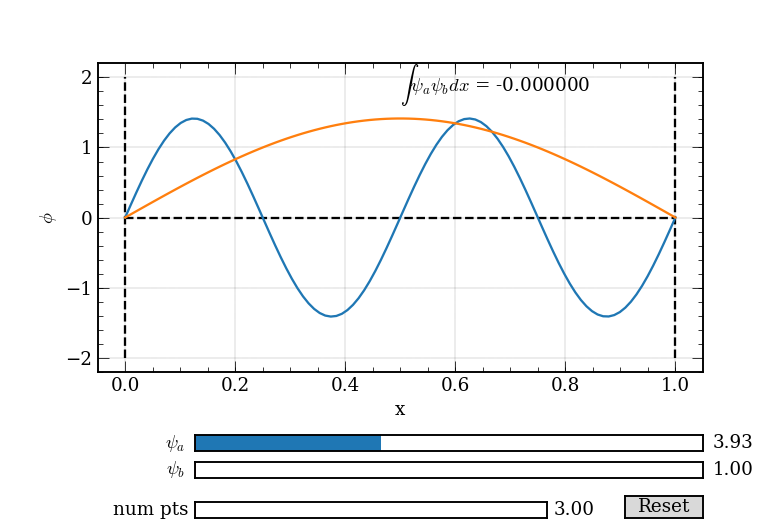

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button

# particle in a box
def particle_in_a_box(x, level, L):
    norm = np.sqrt(2.0/L)
    psi = norm*np.sin(level*np.pi*x/L)
    return psi

# integration
def gaussian_quadrature(a, b, f, n, level1, level2, L):
    '''
    INPUT
        a: (float) minimum x-value to evaluate
        b: (float) maximum x-value to evaluate
        f: function
        n: (int) number of points to evaluate
    OUPUT
        returns (float)
    '''
    # determination of optimal points and weights for evaluation based on
    # legendre polynomials
    x, w = np.polynomial.legendre.leggauss(n)
    # change of variables for [-1,1] to [a,b]
    x = ((b - a) / 2.0) * x + ((b + a) / (2.0))
    try:
        estimate = ((b - a) / 2.0) * np.sum(w * f(x,level1,L) * f(x,level2,L))
    except:
        f_temp = pf.sympy2numpy_function_converter(f,x)
        estimate = ((b - a) / 2.0) * np.sum(w * f_temp(x,level1,L) * f_temp(x,level2,L))
    return estimate


# Set up variables
a = 0
b = 1
L = 1
x = np.linspace(a,b,100)
level1 = 1
level2 = 1

# calculate eigenfunctions
eigenfunction_one = particle_in_a_box(x,level1,L)
eigenfunction_two = particle_in_a_box(x,level2,L)

# integrate overlap
num_pts = 3
integral_estimator = gaussian_quadrature(a, b, particle_in_a_box, num_pts, level1, level2, L)

#plot
fig, ax = plt.subplots()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('$\phi$')
plt.subplots_adjust(bottom=0.3)
ax.set_autoscale_on(True)
ax.autoscale_view(True,True,True)

xmin = 0
xmax = 1
ymin =-2
ymax = 2
edge1 = ax.plot([xmin, xmin], [ymin, ymax],color='black',linestyle='--')
edge2 = ax.plot([xmax, xmax], [ymin, ymax],color='black',linestyle='--')
edge3 = ax.plot([xmin, xmax], [0, 0],color='black',linestyle='--')


line, = ax.plot(x, eigenfunction_one)
line2, = ax.plot(x, eigenfunction_two)

overlap_annotation = ax.annotate(r'$\int  \psi_a \psi_b dx$ = {:.6f}'.format(integral_estimator), xy = (0.5*xmax,0.9*ymax))
axeigenfunction_two = plt.axes([0.25, 0.1, 0.65, 0.03])
axeigenfunction_one = plt.axes([0.25, 0.15, 0.65, 0.03])
axnum_pts = plt.axes([0.25, 0.025, 0.45, 0.03])

s_eigenfunction_one= Slider(axeigenfunction_one, r'$\psi_a$', 1, 9, valinit=1)
s_eigenfunction_two = Slider(axeigenfunction_two, r'$\psi_b$', 1, 9, valinit=1)
s_num_pts = Slider(axnum_pts, 'num pts', 3, 20, valinit=1)

def update(val):
    level1 = (int)(np.round(s_eigenfunction_one.val))
    level2 = (int)(np.round(s_eigenfunction_two.val))
    num_pts = (int)(np.round(s_num_pts.val))

    integral_estimator = gaussian_quadrature(a, b, particle_in_a_box, num_pts, level1, level2, L)
    overlap_annotation.set_text(r'$\int  \psi_a \psi_b dx$ = {:.6f}'.format(integral_estimator))
    eigenfunction_one = particle_in_a_box(x,level1,L)
    eigenfunction_two = particle_in_a_box(x,level2,L)

    line.set_ydata(eigenfunction_one)
    line2.set_ydata(eigenfunction_two)
    ax.relim()

    ax.autoscale_view(True,True,True)
#     fig.canvas.draw_idle()
    fig.canvas.draw()

s_eigenfunction_one.on_changed(update)
s_eigenfunction_two.on_changed(update)
s_num_pts.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
reset_button = Button(resetax, 'Reset', hovercolor='0.975')

def reset(event):
    s_eigenfunction_one.reset()
    s_eigenfunction_two.reset()
    s_num_pts.reset()


reset_button.on_clicked(reset)


plt.show()


# Your Task Continued
Consider the case of $a$ = $b$ = 1
1. What would you expect the overlap of $\phi_a$ and $\phi_b$?
2. What is the result of the overlap for $\phi_a$  and $\phi_b$ if the number of points = 9?
3. What is the result of the overlap for $\phi_a$  and $\phi_b$ if the number of points = 3?
4. How can you explain these results?

Consider the case of  $a$ = 9 and $b$ = 1
1. What would you expect the overlap of $\phi_a$ and $\phi_b$?
2. What is the result of the overlap for $\phi_a$  and $\phi_b$ if the number of points = 9?
3. What is the result of the overlap for $\phi_a$  and $\phi_b$ if the number of points = 3?
4. How can you explain these results?
